# Data Load


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
#%matplotlib tk

#import matplotlib 
#matplotlib.font_manager._rebuild()

In [2]:
# 한글 폰트가 깨지면 실행하세요! 
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext='ttf')
# 아래 주석을 지워서 폰트 리스트를 확인하고 한글 폰트를 font_path에 추가합니다
fontlist[:]

from matplotlib import font_manager, rc
#font_path = 'C:\\Users\\mtang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data_big.csv")

data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price
0,201709,24432350113,친쿡부대찌개 오류동본점,뷔페,고기 뷔페,126.844998,37.496882,12881013.37,21514
1,201709,13141330215,드럼통집,뷔페,고기 뷔페,127.096574,37.505706,33931612.72,52264
2,201706,39421720107,하우돈,뷔페,고기 뷔페,126.906290,37.518280,21456513.16,42656
3,201706,4602500509,고고생고기,뷔페,고기 뷔페,127.109240,37.501153,6140707.30,34561
4,201709,39313780106,현대식당,뷔페,고기 뷔페,126.980601,37.518535,6091482.50,38423
...,...,...,...,...,...,...,...,...,...
2927734,201803,66340980106,최가네 남원추어탕,수산물,회/수산물 일반,126.963825,37.526863,13693767.90,21511
2927735,201803,7211800169,우미도라꾸,수산물,회/수산물 일반,127.070132,37.536551,17432801.29,74559
2927736,201804,7408500552,연안해물칼국수 행당점,수산물,회/수산물 일반,127.033712,37.559118,17023101.74,34212
2927737,201803,36412610212,동해수산,수산물,회/수산물 일반,127.127448,37.537151,31533908.77,52973


# EDA 

2,927,739 rows X 9 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음) -> 군집화, labeling 필요
  - shop_type_big -> 15 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 61 category

- 매출 정보
  - date -> 24 category, 201606~ 201805 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보-> X


##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code는 input feature에 넣어야 하는가?
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [6]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927739 entries, 0 to 2927738
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                int64  
 1   shop_code           int64  
 2   shop_name           object 
 3   shop_type_big       object 
 4   shop_type_small     object 
 5   longitude           float64
 6   latitude            float64
 7   monthly_gain        float64
 8   average_sale_price  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 201.0+ MB


### shop_name, shop_code
- shop_code가 식별자 feature, 가게는 동일하지만 가게명이 바뀌는 경우가 존재함
    - shop_name(13,633), shop_code(13,352) -> 약 300 가게 정도는 이름이 바뀐 것으로 추정
    - 확인 결과 총 222가게가 이름을 최소 2번 바꾸었으며 평균 4번, 최대 66번 바꾸었음 
- 결론-> shop code, shop name 은 모델입력으로 적합하지 않음
- 업종 별 매출 예측으로만 봐야 적당할 것으로 보임

In [8]:
# shop_name과 shop_code가 항상 같다면, 위 두 숫자가 같아야 하는데 약 300개의 data가 차이가 남 
# shop_code는 동일하지만(가게는 동일하지만) 업종, 가게명이 바뀌었을 수도 있음 -> shop_code를 식별자 feature로 사용

print(data['shop_name'].nunique())
print(data['shop_code'].nunique())
print(data['date'].unique())

131631
170058
[201709 201706 201707 201708 201711 201712 201710 201801 201610 201701
 201612 201611 201703 201705 201704 201702 201606 201607 201608 201609
 201803 201804 201802 201805]


In [9]:
# shop code 를 group by 했을 때 그 안에 몇 종류의 shop name이 있는지 (1이어야 정상)

check_df = data.groupby('shop_code')['shop_name'].nunique().to_frame('shop_name_unique').reset_index()
check_df

,shop_code,shop_name_unique
0,190132,1
1,230139,1
2,790213,1
3,970217,1
4,1250101,1
...,...,...
170053,99990650214,1
170054,99990910211,1
170055,99990980117,1
170056,99991260108,1


In [10]:
# shop code안에 여러 shop name 있는 경우

check_df2 = check_df[check_df['shop_name_unique'] > 1]
check_df2

,shop_code,shop_name_unique
161,105500801,2
266,118100526,2
499,148500219,2
597,158700791,2
1176,228500370,3
...,...,...
169473,99270740120,2
169649,99488110116,16
169739,99598610607,2
169769,99638190109,2


In [11]:
# 총 222가게가 이름을 최소 2번 바꾸었으며 평균 4번, 최대 66번 바꾸었음 

check_df2['shop_name_unique'].describe()

count    1120.000000
mean        3.804464
std        13.093265
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max       338.000000
Name: shop_name_unique, dtype: float64

In [12]:
# 롯데 월드 안에  놀이기구도 있지만, 편의점, 호텔 등 다는 업종 매출로 잡히는 것들도 있음!
# 결론-> shop code, shop name 은 모델입력으로 적합하지 않음
# 업종 별 매출 예측으로만 봐야 적당할 것으로 보임
data[data['shop_code'] == 148500219]

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price
1151584,201709,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.414098e+08,8286
1155992,201706,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.417959e+08,8249
1157773,201708,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.988173e+08,8846
1160340,201707,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.792850e+08,8503
1178721,201712,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,2.169215e+08,8744
1179312,201711,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.700800e+08,8437
1179348,201801,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.857513e+08,9338
1189447,201710,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.735501e+08,8466
1208389,201701,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,1.889482e+08,8907
1213838,201612,148500219,(주)호텔롯데롯데월드,음식-미분류,음식-미분류,127.098024,37.511472,2.092425e+08,8584


In [4]:
# date column 분석
# shop_cde가 점포 하나하나를 식별하는 feature라면, 모든 각각의 점포가 24개의 date data를 가지고 있는지 확인  
check_df3 = data.groupby('shop_code')['date'].nunique().to_frame('date_unique').reset_index()
check_df3['date_unique'].describe()

count    170058.000000
mean         16.918257
std           8.052787
min           1.000000
25%          10.000000
50%          21.000000
75%          24.000000
max          24.000000
Name: date_unique, dtype: float64

In [8]:
check_df3['date_unique'].value_counts().sort_values()

16     3262
18     3333
20     3414
21     3483
17     3531
19     3635
15     3733
22     3843
9      3905
14     3972
12     4063
13     4133
11     4300
10     4337
8      4405
5      4533
6      4566
4      4571
3      4674
7      4699
23     4861
2      5026
1      5092
24    74687
Name: date_unique, dtype: int64

In [11]:
data['date'].unique()

array([201709, 201706, 201707, 201708, 201711, 201712, 201710, 201801,
       201610, 201701, 201612, 201611, 201703, 201705, 201704, 201702,
       201606, 201607, 201608, 201609, 201803, 201804, 201802, 201805],
      dtype=int64)

In [18]:
# 1개의 date 데이터만 가진 점포 데이터가 5092개가 존재
# 2개의 date 데이터만 가진 점포 데이터가 5026개 존재 
# 3 -> 4674, 4->273 .,,, 
# 가정1) 오래 장사를 한 점포일수록 매출이 높을 것이다, date 개수가 많을 수록 monthly_gain.sum()이 높아질 것  
# 가정2) date가 1개인 점포는 매출데이터를 신뢰할 수 있을까? 2018년2월데이터가 아닌 2017년 3월데이터(시작날짜)라면 개점하자마자 폐점?
# 하지만 date 데이터를 1~12로 새로운 column으로 넣어준다 하더라도...
# 상점 하나하나가 아닌 월 매출 데이터 하나하나를 보는 것이기 때문에 넣기가 어려울 것 같음 
check_df3[check_df3['date_unique']<4]

,shop_code,date_unique
27,21920417,3
53,49620135,3
71,62810304,1
75,70180206,3
77,70920211,3
...,...,...
169948,99868520506,3
170004,99940240119,2
170015,99949890102,1
170026,99958190514,2


### Preprocessing for more eda...

In [20]:
# 매출데이터에 0값은 없음 -> 정확한 eda를 위해서 이를 제거하고 계속 진행하겠음 
preprocessed = data[data.monthly_gain!=0].copy()
#preprocessed

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price
0,201709,24432350113,친쿡부대찌개 오류동본점,뷔페,고기 뷔페,126.844998,37.496882,12881013.37,21514
1,201709,13141330215,드럼통집,뷔페,고기 뷔페,127.096574,37.505706,33931612.72,52264
2,201706,39421720107,하우돈,뷔페,고기 뷔페,126.906290,37.518280,21456513.16,42656
3,201706,4602500509,고고생고기,뷔페,고기 뷔페,127.109240,37.501153,6140707.30,34561
4,201709,39313780106,현대식당,뷔페,고기 뷔페,126.980601,37.518535,6091482.50,38423
...,...,...,...,...,...,...,...,...,...
2927734,201803,66340980106,최가네 남원추어탕,수산물,회/수산물 일반,126.963825,37.526863,13693767.90,21511
2927735,201803,7211800169,우미도라꾸,수산물,회/수산물 일반,127.070132,37.536551,17432801.29,74559
2927736,201804,7408500552,연안해물칼국수 행당점,수산물,회/수산물 일반,127.033712,37.559118,17023101.74,34212
2927737,201803,36412610212,동해수산,수산물,회/수산물 일반,127.127448,37.537151,31533908.77,52973


In [21]:
print(preprocessed['shop_type_big'].unique())
print(len(preprocessed['shop_type_big'].unique()))
print(preprocessed['shop_type_big'].isnull().value_counts())

['뷔페' '한식' '분식' '별식/퓨전요리' '수산물' '일식' '패스트푸드' '제과제빵떡케익' '중식' '유흥주점' '소매'
 '생활서비스' '양식' '음식-미분류' '다방/커피숍/카페']
15
False    2927739
Name: shop_type_big, dtype: int64


In [16]:
null_index = preprocessed[preprocessed['shop_type_big'].isnull()==True].index
preprocessed = preprocessed.drop(null_index).reset_index().drop("index", axis=1)
preprocessed

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145482,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
145483,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
145484,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
145485,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [24]:
# 다행히도 shop_type_small에 대한 Nan값은 shop_type_big에서 제거함으로써 같이 제거된것으로 보입니다 
# preprocessed -> eda를 위해 전처리한 dataframe, data대신 해당 dataframe에서 쪼개서 eda를 진행합니다 
print(preprocessed['shop_type_small'].unique())
print(len(preprocessed['shop_type_small'].unique()))
print(preprocessed['shop_type_small'].isnull().value_counts())

['고기 뷔페' '고기구이/육회 전문점' '곱창/양구이 전문점' '구내식당' '국수/수제비 전문점' '기타세계요리 전문점'
 '낙지/문어/오징어/쭈꾸미 전문점' '냉면 전문점' '덮밥/가정식' '도너츠/꽈배기/고로케/호떡 전문점'
 '도시락/컵밥/주먹밥/배달음식 전문점' '돈가스 전문점' '떡/한과 전문점' '마라/양꼬치/훠궈 전문점' '면 전문점'
 '미분류 유흥업소' '민속주점' '바닷가재/게요리 전문점' '반찬 판매' '백화점' '버거 전문점' '베트남음식 전문점'
 '보쌈/족발 전문점' '분식 전문점' '샌드위치/토스트/핫도그 전문점' '샤브샤브 전문점' '세탁소' '소주방/포장마차'
 '순대 전문점' '슈퍼/잡화/할인매장' '스테이크 전문점' '식료품' '아이스크림/빙수 판매' '오리/닭요리 전문점'
 '오리/닭요리/탕/백숙 전문점' '와인/칵테일/위스키 바' '음식-미분류' '이자까야/꼬치구이' '이태리 전문점'
 '인도음식 전문점' '일반 중식당' '장어 전문점' '전통찻집' '제과/제빵 전문점' '조개 전문점' '종합 뷔페'
 '죽요리 전문점' '참치 전문점' '초밥 전문점' '치킨/닭강정 전문점' '카레 전문점' '카페/디저트' '테이크아웃 음료 전문점'
 '편의점' '퓨전음식 전문점' '피자 전문점' '한식국물요리 전문점' '한정식/백반 전문점' '호프/맥주' '화로구이 전문점'
 '회/수산물 일반']
61
False    2927739
Name: shop_type_small, dtype: int64


### shop_type_big, shopt_type_small, monthly_gain
- 매출 데이터(monthly_gain)에 missing value 결측치 존재(3,605개) -> 제거하고 확인 총 149,789개 
- shop_type_big에 missing vlaue 결측치 존재(4,303개) -> 제거하고 확인 총 145,487개
- monthly_gain 
    - mean|     80,595,343.95 | 8천
    - min |               5.01| 
    - 25% |	     4,557,295.50 | 4백만
    - 50% |	    15,793,050.00 | 1천5백만
    - 75% |	    43,372,024.00 | 4천3백만
    - max | 65,341,444,752.55 | 653억4천1백만 (원래 1000억 넘게 나왔는데 결측치때문이였던 것 같음)
- average_sale_price
    - mean|    190,292.08
    - min |          1.00
    - 25% |     18,559.00 | 1천8백
    - 50% |     47,145.00 | 4천7백
    - 75% |    141,594.50 | 1억4천
    - max | 82,360,957.00 | 823억6천
- shop type big (13)
    - 음식(51004) 소매(47318) 의료(16618) 생활서비스(16074) 학문/교육(4495) 관광/여가/오락(3676) 도매/유통/무역(2607) 스포츠(1525) 숙박(1198) 제조(518) 부동산(335) 전자/정보통신(98) 기술서비스(21)
    - min 
    - '기술서비스', '전자/정보통신', '제조', '의료', '부동산', '숙박', '스포츠', '도매/유통/무역', '음식', '학문/교육', '관광/여가/오락', '소매', '생활서비스'
    - 부동산(10,060) 기준 이하(7곳)은 비슷함
    - mean 
    - '도매/유통/무역', '숙박', '제조', '전자/정보통신', '소매', '의료', '관광/여가/오락', '학문/교육', '음식', '생활서비스', '스포츠', '부동산', '기술서비스'
    - max 
    - '도매/유통/무역', '소매', '관광/여가/오락', '제조', '숙박', '의료', '전자/정보통신', '생활서비스', '학문/교육', '음식', '스포츠', '부동산', '기술서비스'
- 평균만 놓고 보아도 가장 낮은 업종은 천만원대, 가장 높은 업종은 억대이다 
- shop type small (367)


### monthly_gain

In [18]:
df_check = preprocessed[['monthly_gain','shop_type_small','shop_type_big', 'average_sale_price']].copy()
# 데이터 값 실수. 소수점 두째자리까지 표시df
pd.set_option('display.float_format', '{:.2f}'.format) 

df_check

,monthly_gain,shop_type_small,shop_type_big,average_sale_price
0,5696400.00,카페 일반,음식,9982
1,8496120.00,한정식/백반 전문점,음식,14503
2,103651502.50,고기구이 전문점,음식,72527
3,96785751.00,고기구이 전문점,음식,70225
4,126635883.60,스포츠용품 판매,소매,91884
...,...,...,...,...
145482,22775270.00,학원-기타,학문/교육,1114250
145483,1555300.00,화장품 판매,소매,33556
145484,313410614.50,장난감/오락기기/용품 판매,소매,39543
145485,79277246.00,약국,의료,9874


In [19]:
pd.DataFrame(df_check['monthly_gain']).describe()

,monthly_gain
count,145487.00
mean,80595343.95
std,1060799560.71
min,5.01
25%,4557295.50
50%,15793050.00
75%,43372024.00
max,65341444752.55


### average_sale_price

In [20]:
pd.DataFrame(df_check['average_sale_price']).describe()

,average_sale_price
count,145487.00
mean,190292.08
std,816533.53
min,1.00
25%,18559.00
50%,47145.00
75%,141594.50
max,82360957.00


### shop_type_big

In [21]:
group_big_gain = df_check.drop(['shop_type_small', 'average_sale_price'], axis=1).groupby('shop_type_big')
df_group_big_gain = group_big_gain.describe().droplevel(axis=1,level=0)

group_big_ave = df_check.drop(['shop_type_small', 'monthly_gain'], axis=1).groupby('shop_type_big')
df_group_big_ave = group_big_ave.describe().droplevel(axis=1,level=0)

# monthly_gain을 shop_type_big 분야별로 정렬하여 출력
print("내림차순 기준 분야별로 정렬하여 출력합니다 - monthly_gain")
print("min: ", list(df_group_big_gain.sort_values(by=['min'], ascending=False).index))
print("mean: ", list(df_group_big_gain.sort_values(by=['mean'], ascending=False).index))
print("max: ", list(df_group_big_gain.sort_values(by=['max'], ascending=False).index))

# average_sale_price을 shop_type_big 분야별로 정렬하여 출력
print("\n\n내림차순 기준 분야별로 정렬하여 출력합니다 - average_sale_price")
print("min: ", list(df_group_big_ave.sort_values(by=['min'], ascending=False).index))
print("mean: ", list(df_group_big_ave.sort_values(by=['mean'], ascending=False).index))
print("max: ", list(df_group_big_ave.sort_values(by=['max'], ascending=False).index))

내림차순 기준 분야별로 정렬하여 출력합니다 - monthly_gain
min:  ['기술서비스', '전자/정보통신', '제조', '의료', '부동산', '숙박', '스포츠', '도매/유통/무역', '음식', '학문/교육', '관광/여가/오락', '소매', '생활서비스']
mean:  ['도매/유통/무역', '숙박', '제조', '전자/정보통신', '소매', '의료', '관광/여가/오락', '학문/교육', '음식', '생활서비스', '스포츠', '부동산', '기술서비스']
max:  ['도매/유통/무역', '소매', '관광/여가/오락', '제조', '숙박', '의료', '전자/정보통신', '생활서비스', '학문/교육', '음식', '스포츠', '부동산', '기술서비스']


내림차순 기준 분야별로 정렬하여 출력합니다 - average_sale_price
min:  ['기술서비스', '전자/정보통신', '제조', '의료', '부동산', '숙박', '도매/유통/무역', '음식', '학문/교육', '스포츠', '관광/여가/오락', '소매', '생활서비스']
mean:  ['기술서비스', '도매/유통/무역', '학문/교육', '제조', '스포츠', '의료', '숙박', '생활서비스', '소매', '부동산', '전자/정보통신', '관광/여가/오락', '음식']
max:  ['도매/유통/무역', '소매', '제조', '기술서비스', '음식', '생활서비스', '의료', '스포츠', '학문/교육', '숙박', '관광/여가/오락', '부동산', '전자/정보통신']


<AxesSubplot:xlabel='shop_type_big', ylabel='monthly_gain'>

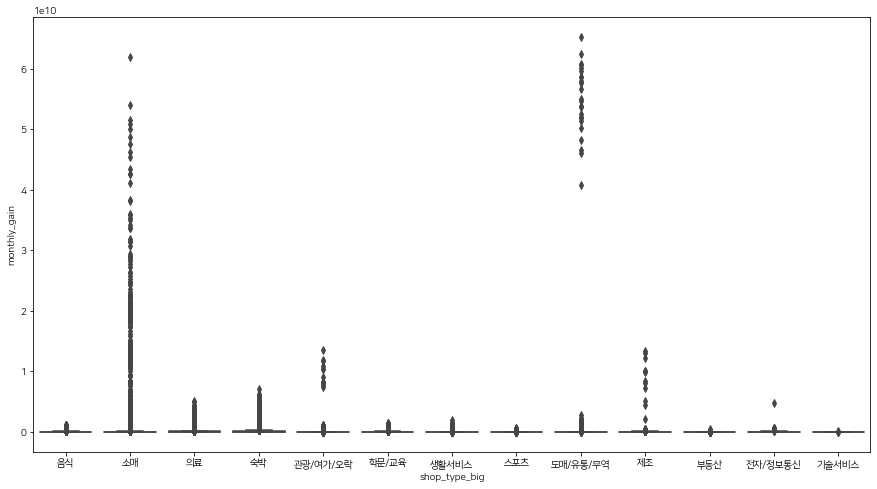

In [22]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='monthly_gain', data=df_check)

<AxesSubplot:xlabel='shop_type_big', ylabel='average_sale_price'>

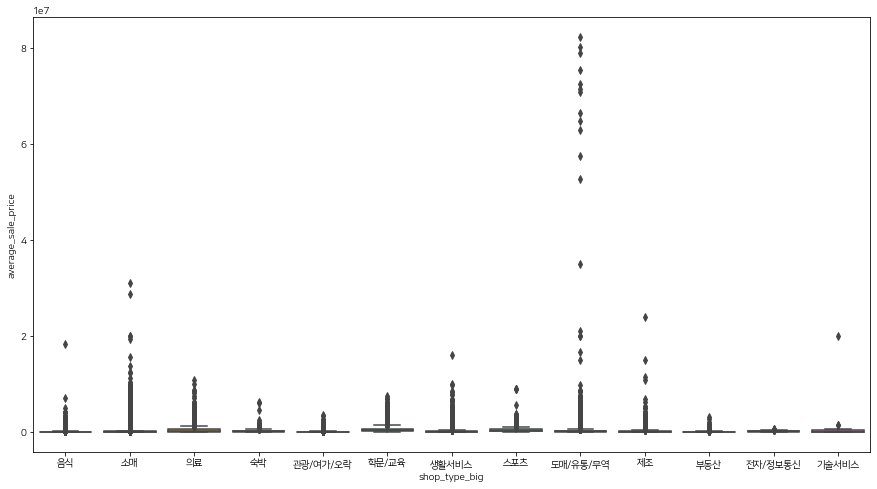

In [23]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='average_sale_price', data=df_check)

관광/여가/오락         AxesSubplot(0.1,0.736957;0.173913x0.163043)
기술서비스       AxesSubplot(0.308696,0.736957;0.173913x0.163043)
도매/유통/무역    AxesSubplot(0.517391,0.736957;0.173913x0.163043)
부동산         AxesSubplot(0.726087,0.736957;0.173913x0.163043)
생활서비스            AxesSubplot(0.1,0.541304;0.173913x0.163043)
소매          AxesSubplot(0.308696,0.541304;0.173913x0.163043)
숙박          AxesSubplot(0.517391,0.541304;0.173913x0.163043)
스포츠         AxesSubplot(0.726087,0.541304;0.173913x0.163043)
음식               AxesSubplot(0.1,0.345652;0.173913x0.163043)
의료          AxesSubplot(0.308696,0.345652;0.173913x0.163043)
전자/정보통신     AxesSubplot(0.517391,0.345652;0.173913x0.163043)
제조          AxesSubplot(0.726087,0.345652;0.173913x0.163043)
학문/교육                AxesSubplot(0.1,0.15;0.173913x0.163043)
dtype: object

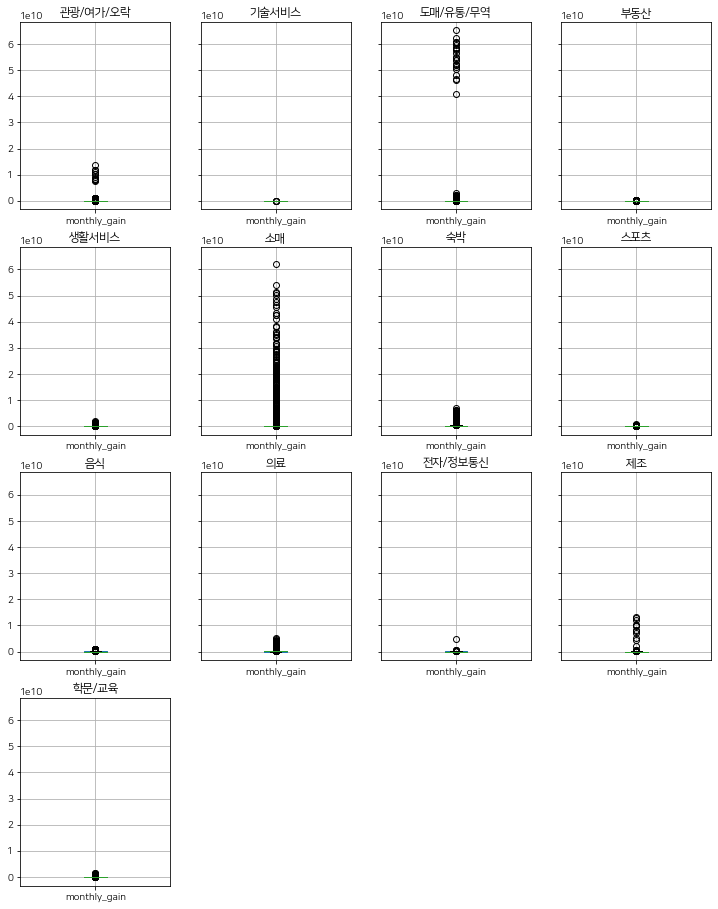

In [24]:
group_big_gain.boxplot(figsize=(12,16))

관광/여가/오락         AxesSubplot(0.1,0.736957;0.173913x0.163043)
기술서비스       AxesSubplot(0.308696,0.736957;0.173913x0.163043)
도매/유통/무역    AxesSubplot(0.517391,0.736957;0.173913x0.163043)
부동산         AxesSubplot(0.726087,0.736957;0.173913x0.163043)
생활서비스            AxesSubplot(0.1,0.541304;0.173913x0.163043)
소매          AxesSubplot(0.308696,0.541304;0.173913x0.163043)
숙박          AxesSubplot(0.517391,0.541304;0.173913x0.163043)
스포츠         AxesSubplot(0.726087,0.541304;0.173913x0.163043)
음식               AxesSubplot(0.1,0.345652;0.173913x0.163043)
의료          AxesSubplot(0.308696,0.345652;0.173913x0.163043)
전자/정보통신     AxesSubplot(0.517391,0.345652;0.173913x0.163043)
제조          AxesSubplot(0.726087,0.345652;0.173913x0.163043)
학문/교육                AxesSubplot(0.1,0.15;0.173913x0.163043)
dtype: object

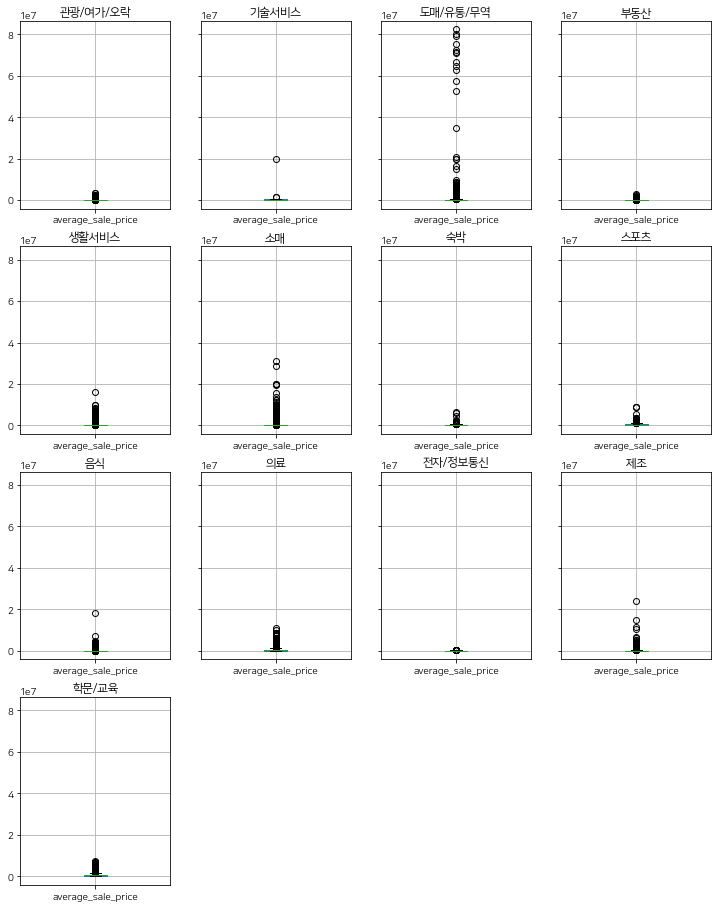

In [25]:
group_big_ave.boxplot(figsize=(12,16))

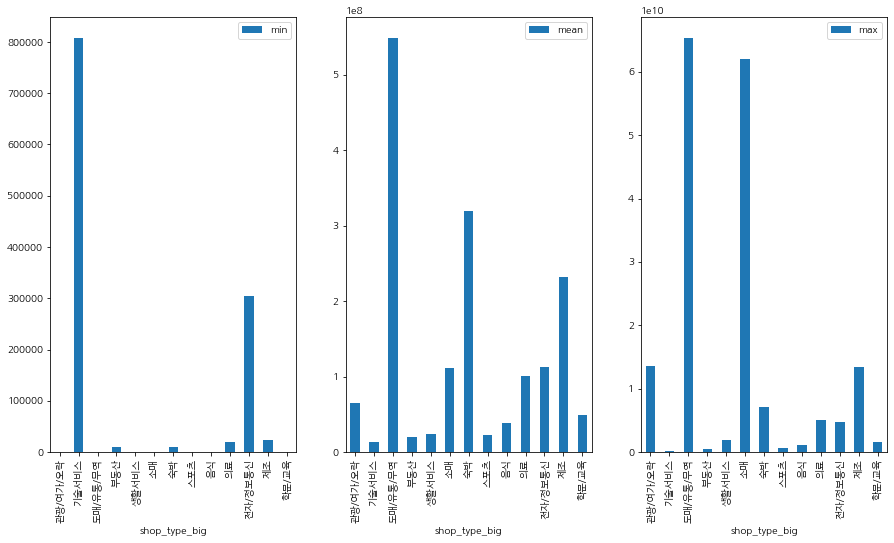

In [34]:
fig, axes = plt.subplots(1, 3)

df_group_big_gain.plot.bar(ax = axes[0], y='min')
df_group_big_gain.plot.bar(ax = axes[1], y='mean')
df_group_big_gain.plot.bar(ax = axes[2], y='max')

plt.rcParams['figure.figsize'] = [14, 6]
plt.show()

In [31]:
group_big_gain.describe()

monthly_gain                                                   \
                     count         mean           std       min         25%   
shop_type_big                                                                 
관광/여가/오락           3676.00  64388292.62  575679631.83     51.10  4023142.50   
기술서비스                21.00  13943846.73   21351746.86 808000.00  5700140.60   
도매/유통/무역           2607.00 548815555.96 5263120674.88    505.00  2494607.50   
부동산                 335.00  19971492.97   45818541.89  10060.00  1318050.00   
생활서비스             16074.00  23442935.42   64376503.79      5.01  1911468.00   
소매                47318.00 111706737.15 1349641190.93     50.50  1993197.50   
숙박                 1198.00 319777074.27  928863107.00  10020.00  3554563.25   
스포츠                1525.00  23185151.82   50190588.17    566.50  4208100.00   
음식                51004.00  38021962.12   51761027.82    505.00  9525460.00   
의료                16618.00 100947957.78  236265927.86  19890.00 16698525.75   
전자/정보통신              98.00 112740146.25  495844820.72 304200.00  7970059.50   
제조                  518.00 231620750.82 1397265893.86  22815.00  3349878.75   
학문/교육              4495.00  49448985.61  113062741.11    501.00  5201750.00   

                                                       
                      50%          75%            max  
shop_type_big                                          
관광/여가/오락       9757873.75  22529178.75 13607950611.05  
기술서비스          7015409.70  11104846.35   100200000.00  
도매/유통/무역       8078625.00  24606258.25 65341444752.55  
부동산            5498360.00  12822965.05   423170630.50  
생활서비스          6061050.00  20207069.55  1899696810.00  
소매             8716365.00  31517596.88 61940852860.50  
숙박            31650875.00 121375267.43  7044862118.80  
스포츠            8701150.00  20112960.00   699951525.00  
음식            22416923.70  47284112.50  1182354420.00  
의료            41054511.00  94885218.75  5053779571.50  
전자/정보통신       20130034.50  52507478.84  4813898925.00  
제조            10255695.50  32287929.00 13366686124.44  
학문/교육         14535690.00  43326611.40  1507953521.10

### shop_type_small

In [35]:
#pd.set_option('display.max_rows', 14)
group_small = df_check.groupby('shop_type_small')
group_small.describe()

monthly_gain                                         \
                       count         mean          std          min   
shop_type_small                                                       
가구 제조                  12.00 325209469.26  86098529.56 194228080.80   
가구 판매-중고              225.00  65620765.76 107607818.94    125750.00   
가발 판매                  11.00   2399512.73   2886515.06    202000.00   
가방 제조                  14.00  41660481.79  16972529.98   4623275.00   
가방/구두 수선               20.00   9444557.00   8012990.42    187590.00   
...                      ...          ...          ...          ...   
화훼/조경/작물 도매            72.00   9395754.45  14255725.62     76050.00   
화훼/조경/작물 재배            12.00   3804386.25   1643307.48   1945570.00   
회/수산물 일반              495.00  42433795.04  37962390.84    413205.00   
회계서비스-일반              478.00  17272984.12  30011516.77         5.01   
휴대폰 판매                 10.00     42428.47     20285.51     20200.00   

                                                                     \
                         25%          50%          75%          max   
shop_type_small                                                       
가구 제조           272035385.45 311795491.55 369982240.12 479638496.00   
가구 판매-중고          5322769.20  16445761.80  77907088.50 541896810.00   
가발 판매              428250.00    561000.00   4432300.00   8343000.00   
가방 제조            38609842.50  45940280.00  52341987.50  60880560.00   
가방/구두 수선           919575.00  11053325.00  14928112.50  21962450.00   
...                      ...          ...          ...          ...   
화훼/조경/작물 도매       1653181.25   3308322.50  12514766.25  69438030.00   
화훼/조경/작물 재배       2682581.25   3811462.50   4304842.50   7992040.00   
회/수산물 일반         15472372.50  31405950.00  55310442.75 247195905.00   
회계서비스-일반          1583920.00   5896677.50  21510843.75 240448350.00   
휴대폰 판매              29115.00     40720.00     44696.18     92700.00   

                average_sale_price                                            \
                             count       mean        std       min       25%   
shop_type_small                                                                
가구 제조                        12.00  401603.00  105063.07 263728.00 341093.50   
가구 판매-중고                    225.00 1016358.93 1923896.08  11661.00  78779.00   
가발 판매                        11.00  131848.55  146528.12  30000.00  40000.00   
가방 제조                        14.00  193753.21  334075.30  68626.00  72395.50   
가방/구두 수선                     20.00   73935.95   25273.93  18500.00  61835.25   
...                            ...        ...        ...       ...       ...   
화훼/조경/작물 도매                  72.00   75535.96  127175.43   7500.00  25000.00   
화훼/조경/작물 재배                  12.00   42764.08   33471.76  18957.00  23440.00   
회/수산물 일반                    495.00   88084.28   53953.41  13062.00  53642.50   
회계서비스-일반                    478.00  392556.35  718758.56      1.00  33966.25   
휴대폰 판매                       10.00    7447.00    2032.04   4000.00   5750.00   

                                                  
                      50%        75%         max  
shop_type_small                                   
가구 제조           359771.00  435534.25   660823.00  
가구 판매-중고        352954.00 1124222.00 19320000.00  
가발 판매            45000.00  185833.50   405000.00  
가방 제조            81931.00   90983.75  1300000.00  
가방/구두 수선         71826.50   92173.50   115000.00  
...                   ...        ...         ...  
화훼/조경/작물 도매      30562.50   42985.25   850956.00  
화훼/조경/작물 재배      34649.00   43304.75   142182.00  
회/수산물 일반         78097.00  112258.50   371865.00  
회계서비스-일반        117045.00  458185.50  8250000.00  
휴대폰 판매            8000.00    8867.50    10000.00  

[367 rows x 16 columns]

C:\Users\Hyeongbin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Monthly gain Histogram with Density Plot')

C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


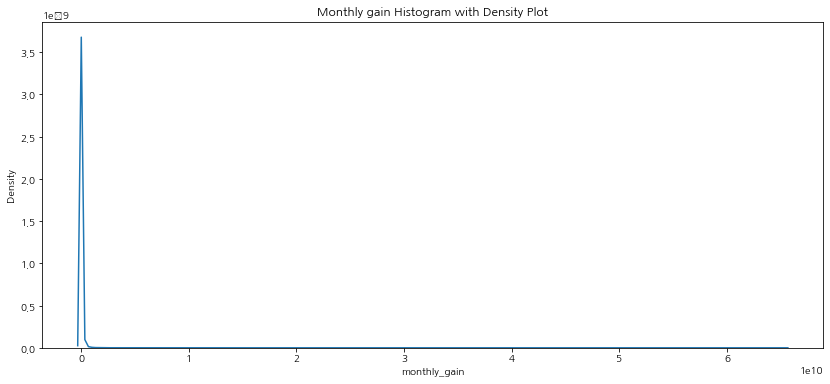

In [36]:
# density plot only
ax = plt.subplots()
ax = sns.distplot(df_check['monthly_gain'], hist = False)
ax.set_title('Monthly gain Histogram with Density Plot')

C:\Users\mtang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average sale price Histogram with Density Plot')

C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


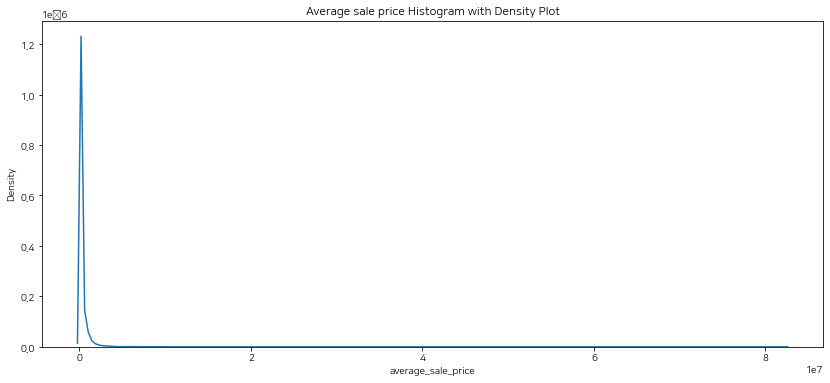

In [92]:
# density plot only
ax = plt.subplots()
ax = sns.distplot(df_check['average_sale_price'], hist = False)
ax.set_title('Average sale price Histogram with Density Plot')

### average sale price, monthly gain correlation 
- 따로 단가와 매출의 상관관계를 분석합니다

In [37]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_check['shop_type_big'] = le.fit_transform(list(df_check['shop_type_big']))   # fit transform으로 한번에 처리 가능

le = LabelEncoder()

df_check['shop_type_small'] = le.fit_transform(list(df_check['shop_type_small'])) 
#le.classes_
df_check

,monthly_gain,shop_type_small,shop_type_big,average_sale_price
0,5696400.00,308,8,9982
1,8496120.00,350,8,14503
2,103651502.50,17,8,72527
3,96785751.00,17,8,70225
4,126635883.60,173,5,91884
...,...,...,...,...
145482,22775270.00,327,12,1114250
145483,1555300.00,361,5,33556
145484,313410614.50,261,5,39543
145485,79277246.00,193,9,9874


C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hyeongbin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


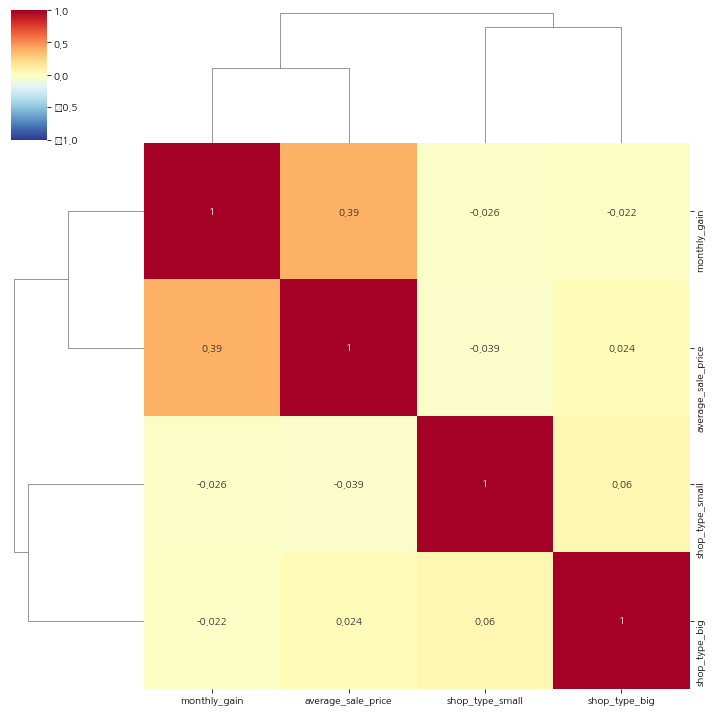

In [38]:
corr = df_check.corr()

sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### longitude, latitude 
- longitude 경도(세로)
- latitude 위도(가로)
- Clustering 결과 대략 9개의 클러스터로 나뉘는 것을 알 수 있음
- 각 클러스터별 데이터 개수, monthly_gain의 평균값을 오름차순으로 정리한 것은 다음과 같음
- count:  [7, 8, 6, 0, 5, 4, 3, 2, 1]
- mean:  [5, 2, 3, 4, 1, 0, 6, 8, 7]

In [39]:
pd.set_option('display.float_format', None)
df_geo = preprocessed[['longitude', 'latitude', 'monthly_gain']].copy()

drop_longitude = df_geo[df_geo['longitude']==0].index 
drop_latitude = df_geo[df_geo['latitude']==0].index 
print(len(drop_longitude))
print(len(drop_latitude))

0
0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

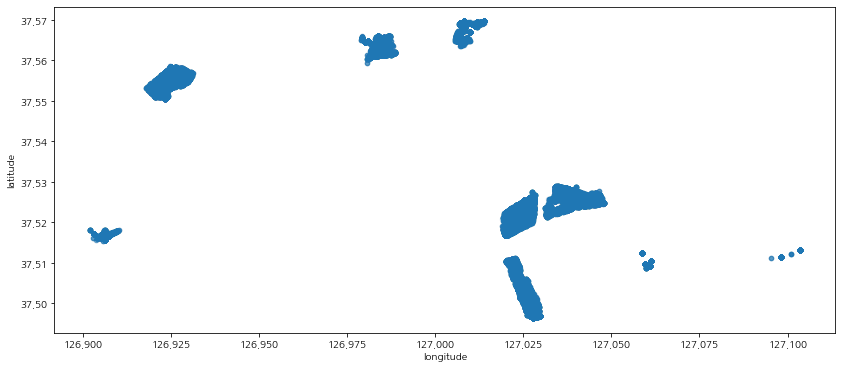

In [40]:
df_geo.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

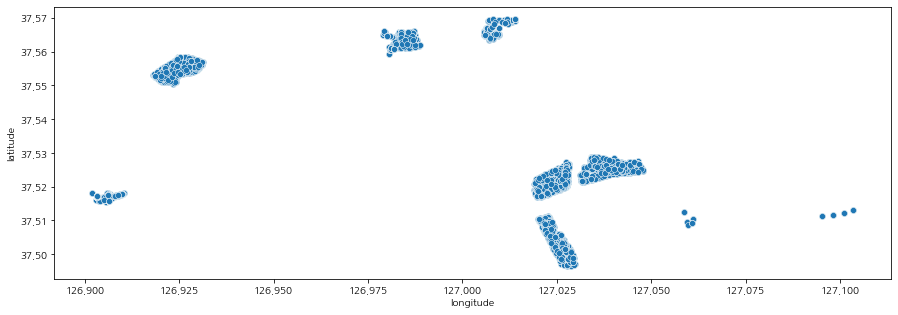

In [41]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='longitude',y='latitude',data=df_geo)

In [42]:
from sklearn.cluster import KMeans

#points = df_gps[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=9).fit(df_geo[['latitude', 'longitude']])
kmeans.cluster_centers_

array([[ 37.56303621, 126.9841561 ],
       [ 37.50237545, 127.02577178],
       [ 37.55455139, 126.92418409],
       [ 37.52572161, 127.03891008],
       [ 37.56771489, 127.0085615 ],
       [ 37.51213945, 127.10025794],
       [ 37.52161047, 127.02413966],
       [ 37.51695744, 126.9056348 ],
       [ 37.51137948, 127.05952426]])

In [43]:
kmeans.labels_

array([2, 1, 1, ..., 8, 5, 5])

In [44]:
df_geo['cluster'] = kmeans.labels_
df_geo

,longitude,latitude,monthly_gain,cluster
0,126.927911,37.558043,5.696400e+06,2
1,127.022532,37.506856,8.496120e+06,1
2,127.025013,37.505696,1.036515e+08,1
3,127.025013,37.505696,9.678575e+07,1
4,126.903306,37.517063,1.266359e+08,7
...,...,...,...,...
145482,127.040033,37.525081,2.277527e+07,3
145483,127.046604,37.524470,1.555300e+06,3
145484,127.060835,37.509203,3.134106e+08,8
145485,127.103491,37.513101,7.927725e+07,5


Text(0.5, 1.0, 'k-mean')

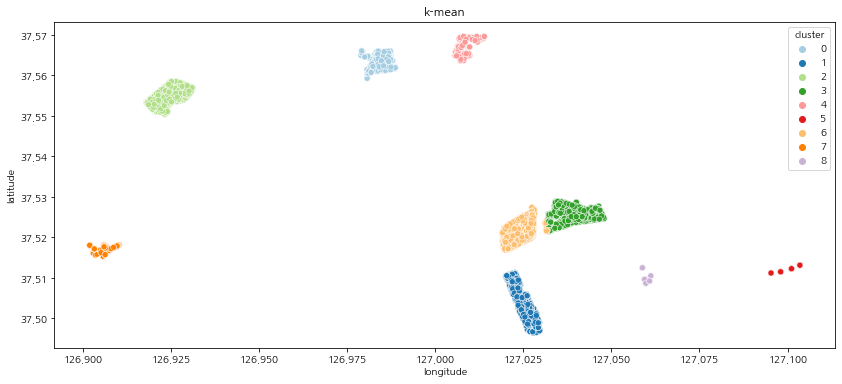

In [45]:
sns.scatterplot(x='longitude' , y='latitude', hue="cluster", data=df_geo, palette="Paired")
plt.title('k-mean')

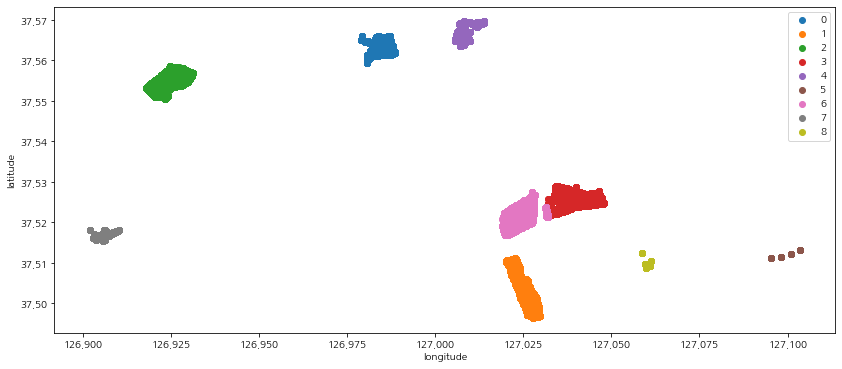

In [46]:
for i in range(9):
    labels=df_geo[df_geo["cluster"]==i]
    plt.scatter(labels['longitude'],labels['latitude'],label=i)

plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [47]:
pd.set_option('display.float_format', '{:.2f}'.format) 
group_geo = df_geo.groupby('cluster')
group_geo['monthly_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,15791.00,105672830.35,1677737477.04,5010.00,2859480.00,11195894.00,31834662.90,61940852860.50
1,30012.00,70787554.93,185487959.72,5.01,8706638.75,27148992.15,66637830.75,5053779571.50
2,26474.00,32223649.99,204755767.12,501.00,4424101.00,12041535.00,30423912.00,13366686124.44
3,22922.00,63236208.11,467029930.87,501.00,7214838.38,21698835.50,52931479.88,23188943027.60
4,16092.00,20936585.17,278297207.82,50.50,817600.00,3036060.00,13230412.50,13101776664.99
5,1800.00,722460192.13,3252835817.77,18611.00,8069275.15,35448545.95,104961069.15,34258990371.00
6,24266.00,48044592.33,465217779.02,51.10,5670637.50,16453015.00,38454882.38,27816363643.85
7,5003.00,135685239.80,939535616.87,15450.00,8062970.00,28693110.00,72704567.75,15189611552.70
8,3127.00,686858510.88,5062248788.55,12072.00,13851684.50,45011422.65,109184410.50,65341444752.55


In [51]:
print("오름차순 기준 클러스터별로 정렬하여 출력합니다")
print("count: ", list(group_geo['monthly_gain'].describe().sort_values(by=['count']).index))
print("mean: ", list(group_geo['monthly_gain'].describe().sort_values(by=['mean']).index))
group_geo['monthly_gain'].describe().sort_values(by=['count'])

오름차순 기준 클러스터별로 정렬하여 출력합니다
count:  [5, 8, 7, 0, 4, 3, 6, 2, 1]
mean:  [4, 2, 6, 3, 1, 0, 7, 8, 5]


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
5,1800.0,7.224602e+08,3.252836e+09,18611.00,8.069275e+06,35448545.95,1.049611e+08,3.425899e+10
8,3127.0,6.868585e+08,5.062249e+09,12072.00,1.385168e+07,45011422.65,1.091844e+08,6.534144e+10
7,5003.0,1.356852e+08,9.395356e+08,15450.00,8.062970e+06,28693110.00,7.270457e+07,1.518961e+10
0,15791.0,1.056728e+08,1.677737e+09,5010.00,2.859480e+06,11195894.00,3.183466e+07,6.194085e+10
4,16092.0,2.093659e+07,2.782972e+08,50.50,8.176000e+05,3036060.00,1.323041e+07,1.310178e+10
3,22922.0,6.323621e+07,4.670299e+08,501.00,7.214838e+06,21698835.50,5.293148e+07,2.318894e+10
6,24266.0,4.804459e+07,4.652178e+08,51.10,5.670638e+06,16453015.00,3.845488e+07,2.781636e+10
2,26474.0,3.222365e+07,2.047558e+08,501.00,4.424101e+06,12041535.00,3.042391e+07,1.336669e+10
1,30012.0,7.078755e+07,1.854880e+08,5.01,8.706639e+06,27148992.15,6.663783e+07,5.053780e+09


<AxesSubplot:xlabel='cluster'>

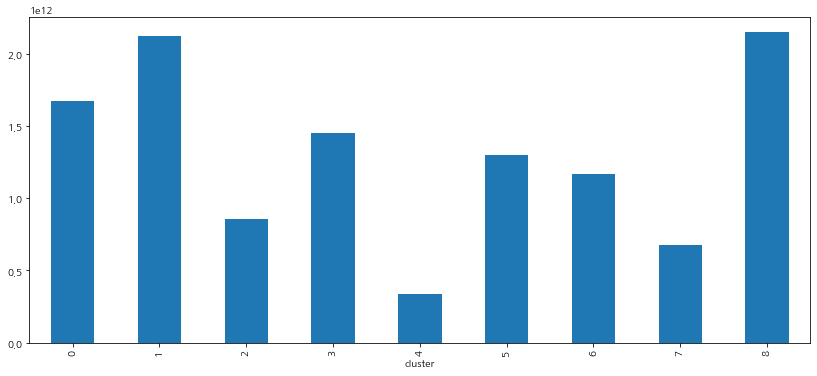

In [49]:
# 클러스터별 매출 총 합산액
group_geo['monthly_gain'].sum().plot.bar()

### 성별, 요일, 시간 
- 확인 안하면 큰일날 뻔 했다... 
- 성별에 0만 가득찬 데이터가 1,187개 존재 
- 제거하면 총 144,300개 data

In [62]:
pd.set_option('display.float_format', None)

df_gender = preprocessed[[ 
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50']].copy()
df_time = preprocessed[[
    'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6']].copy()
df_week = preprocessed[['time_05_10', 'time_10_14', 'time_14_18',
            'time_18_20', 'time_20_22', 'time_22_24', 'time_00_05']].copy()

In [63]:
df_gender.describe()

,female_20,female_30,female_40,female_50,male_20,male_30,male_40,male_50
count,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000
mean,19.039261,13.612653,10.842249,12.219886,11.868238,11.972859,9.271460,10.357555
std,19.599087,16.188914,15.706277,18.934495,14.769153,14.712838,14.536199,16.683867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.265000,2.220000,0.890000,1.370000,0.000000,0.000000,0.000000,0.020000
50%,14.430000,9.990000,6.480000,5.740000,7.250000,8.510000,4.900000,4.770000
75%,29.670000,18.040000,13.020000,13.510000,18.170000,17.040000,11.540000,11.710000
max,100.000000,100.000000,100.000000,100.010000,100.000000,100.000000,100.000000,100.010000


In [64]:
df_time.describe()

,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
count,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000
mean,10.211496,13.048373,13.892918,14.098295,14.470436,16.685863,17.592633
std,13.121327,15.001117,15.089252,14.883808,15.070688,15.732202,16.583357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.280000,5.070000,5.640000,5.940000,8.280000,6.300000
50%,7.840000,10.750000,11.550000,12.170000,12.510000,14.780000,15.740000
75%,16.070000,16.320000,17.270000,17.210000,17.700000,20.320000,23.410000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [65]:
df_week.describe()

,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
count,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000
mean,5.744538,29.035394,24.397491,15.512641,12.883558,9.088619,3.337769
std,13.495798,24.692053,22.488012,15.822978,15.928525,17.590249,10.471417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.130000,5.820000,1.950000,0.000000,0.000000,0.000000
50%,0.000000,26.210000,21.470000,13.710000,8.560000,0.000000,0.000000
75%,4.770000,42.700000,34.530000,22.700000,19.560000,9.860000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [66]:
df_gender.sum(axis=1).describe()

count    145487.000000
mean         99.184161
std           8.995725
min           0.000000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.030000
dtype: float64

In [68]:
# gender 열에 0.0으로만 가득한 데이터가 1,187개가 존재 
gender_index = df_gender[df_gender.sum(axis=1)==0].index

print(144300+1187)
df_gender=df_gender.drop(gender_index)
df_gender

145487


,female_20,female_30,female_40,female_50,male_20,male_30,male_40,male_50
0,9.58,5.43,18.68,4.63,27.62,8.89,18.47,6.71
1,5.08,12.12,9.68,8.15,9.68,9.75,14.77,30.78
2,10.51,9.64,4.05,3.57,23.30,31.56,8.38,8.98
3,12.10,11.48,6.31,4.77,15.64,30.60,12.65,6.45
4,15.04,10.48,16.90,9.56,21.64,11.67,8.98,5.74
...,...,...,...,...,...,...,...,...
145482,0.00,0.00,25.35,22.82,0.00,26.48,0.00,25.35
145483,0.00,0.00,46.48,44.72,0.00,0.00,8.80,0.00
145484,31.27,14.62,9.13,2.91,19.56,12.47,6.81,3.24
145485,23.15,18.09,9.60,9.93,11.81,10.03,7.25,10.14


In [69]:
df_gender.sum(axis=1).describe()

count    144300.000000
mean        100.000042
std           0.007670
min          99.970000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.030000
dtype: float64